In [1]:
!pip install opencv-python numpy tensorflow


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

%matplotlib inline


In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

gpus = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU:", len(gpus))

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)


Number of GPU: 0


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data:", x_train.shape, y_train.shape)
print("Testing data :", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Testing data : (10000, 28, 28) (10000,)


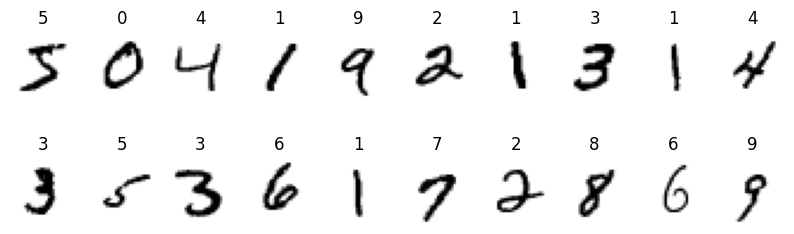

In [5]:
plt.figure(figsize=(10,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


In [7]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [8]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),

    layers.Dense(
        256,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.Dropout(0.4),

    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train_cat,
    epochs=30,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stop]
)


Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1475 - loss: 2.4180 - val_accuracy: 0.4244 - val_loss: 1.8969
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4531 - loss: 1.8342 - val_accuracy: 0.5638 - val_loss: 1.6412
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5151 - loss: 1.6685 - val_accuracy: 0.5813 - val_loss: 1.5430
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5377 - loss: 1.6030 - val_accuracy: 0.5849 - val_loss: 1.5089
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5616 - loss: 1.5438 - val_accuracy: 0.6287 - val_loss: 1.4325
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5858 - loss: 1.4945 - val_accuracy: 0.6508 - val_loss: 1.3907
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6206 - loss: 1.4474 - val_accuracy: 0.6874 - val_loss: 1.3466
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6510 - loss: 1.4061 - val_accu

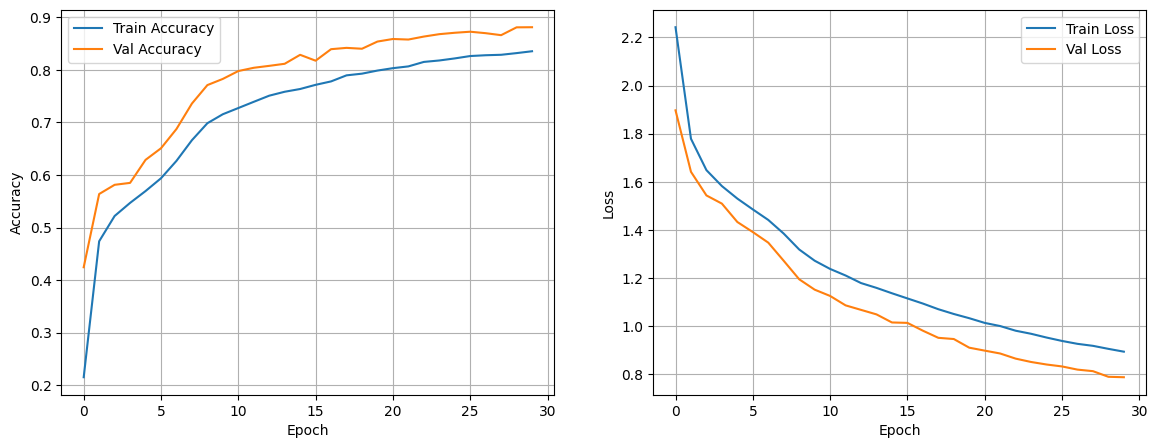

In [11]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.8269
Test Accuracy: 88.05%


In [13]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(button);

      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


In [14]:
def preprocess_and_predict(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found")
        return

    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = cv2.GaussianBlur(img, (5,5), 0)
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

    plt.imshow(img, cmap='gray')
    plt.title("Processed 28×28")
    plt.axis('off')
    plt.show()

    img = img.astype("float32") / 255.0
    img = img.reshape(1, 28, 28)

    pred = model.predict(img, verbose=0)
    digit = np.argmax(pred)
    confidence = np.max(pred)

    print(f"✅ Predicted Digit: {digit}")
    print(f"📊 Confidence: {confidence*100:.2f}%")


<IPython.core.display.Javascript object>

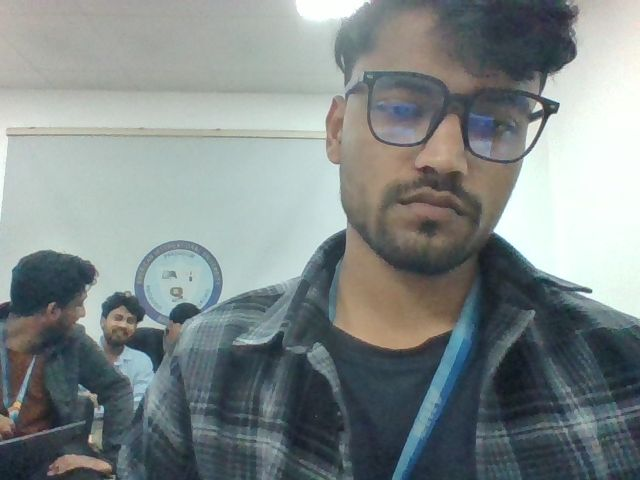

Predicting...


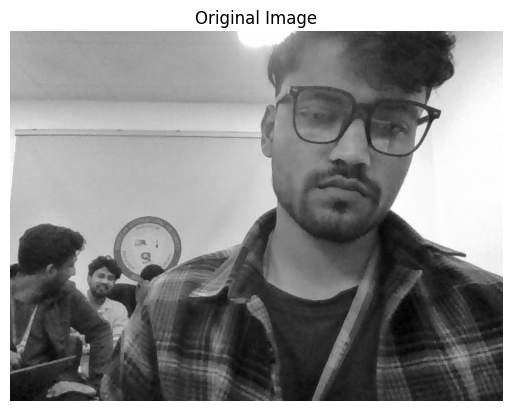

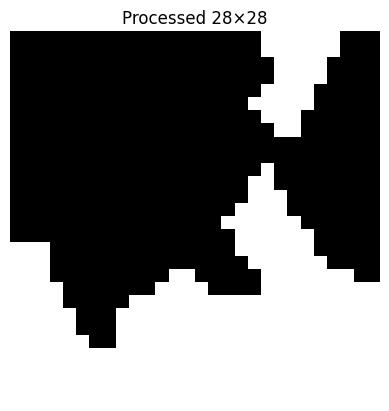

✅ Predicted Digit: 3
📊 Confidence: 100.00%


In [16]:
filename = take_photo()
display(Image(filename))

print("Predicting...")
preprocess_and_predict(filename)
